# Data Preprocessing

In [403]:
# Importing the dataset
import pandas

dataset = pandas.read_csv("./AmesHousing.csv");

In [404]:
from sklearn.impute import SimpleImputer
#impute missing values in numeric categories with the median
numeric_columns = dataset.select_dtypes(include='number').columns
imputerNum = SimpleImputer(strategy="median")
dataset[numeric_columns] = imputerNum.fit_transform(dataset[numeric_columns])

# Impute missing categorical values to "NA"
categorical_columns = dataset.select_dtypes(include='object').columns
imputerCat = SimpleImputer(strategy='constant', fill_value='NA')
dataset[categorical_columns] = imputerCat.fit_transform(dataset[categorical_columns])

In [405]:
from sklearn.preprocessing import OneHotEncoder

ordinalMapping = {
	"NA": -1,
	"Po": 0,
	"Fa": 1,
	"TA": 2,
	"Gd": 3,
	"Ex": 4
}

hotEncoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ordering the orderable features and nulling the unorderable ones
categories = {}
for column in dataset.columns:
	columnData = dataset[column]
	if columnData.dtype == 'object':
		if columnData.apply(lambda item: item in ordinalMapping).all():
			print(dataset[column].name)
			dataset[column] = columnData.apply(lambda item: ordinalMapping[item])
		else:
			newData = hotEncoder.fit_transform(dataset[[column]])
			newColumns = pandas.DataFrame(newData, columns=hotEncoder.get_feature_names_out([column]))
			dataset = pandas.concat([dataset, newColumns], axis=1).drop(column, axis=1)
dataset

Exter Qual
Exter Cond
Bsmt Qual
Bsmt Cond
Heating QC
Kitchen Qual
Fireplace Qu
Garage Qual
Garage Cond
Pool QC


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1.0,526301100.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,526350040.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,526351010.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,526353030.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,527105010.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926.0,923275080.0,80.0,37.0,7937.0,6.0,6.0,1984.0,1984.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2926,2927.0,923276100.0,20.0,68.0,8885.0,5.0,5.0,1983.0,1983.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2927,2928.0,923400125.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2928,2929.0,924100070.0,20.0,77.0,10010.0,5.0,5.0,1974.0,1975.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Finding correlations between the variables
By setting up a correlation table and printing it, we can find which values are good candidates for regression.

In [406]:
# Checking the correlation between the different columns and the sales price
correlation = dataset.corr();
print(correlation["SalePrice"].sort_values(ascending=False).to_string())

SalePrice                 1.000000
Overall Qual              0.799262
Gr Liv Area               0.706780
Exter Qual                0.697970
Kitchen Qual              0.672914
Garage Cars               0.647812
Garage Area               0.640381
Total Bsmt SF             0.632164
1st Flr SF                0.621676
Bsmt Qual                 0.607532
Year Built                0.558426
Full Bath                 0.545604
Fireplace Qu              0.533901
Year Remod/Add            0.532974
Foundation_PConc          0.520966
Garage Yr Blt             0.508882
Mas Vnr Area              0.502196
TotRms AbvGrd             0.495474
Fireplaces                0.474558
BsmtFin Type 1_GLQ        0.455326
Heating QC                0.450325
Neighborhood_NridgHt      0.433299
BsmtFin SF 1              0.432862
Garage Finish_Fin         0.424902
Bsmt Exposure_Gd          0.355665
Sale Type_New             0.354292
Sale Condition_Partial    0.350122
Garage Type_Attchd        0.345635
Lot Frontage        

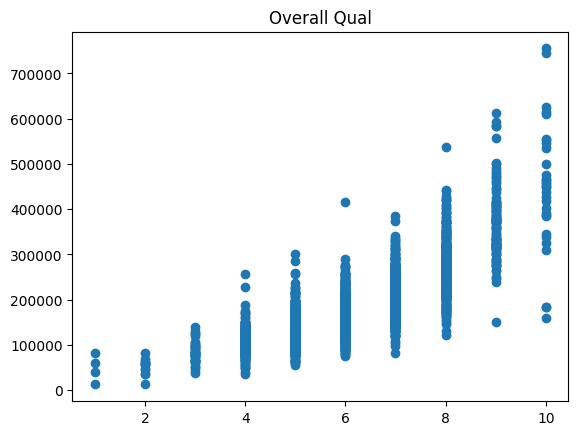

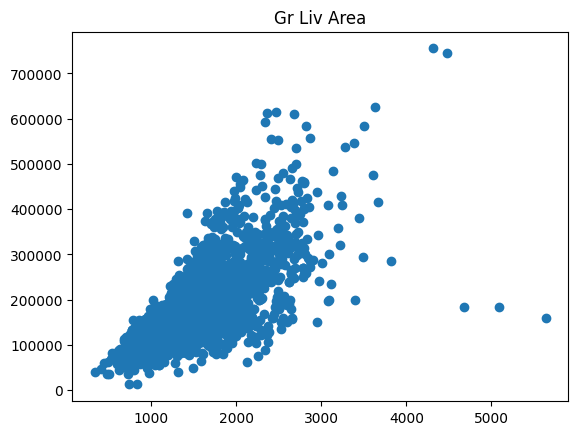

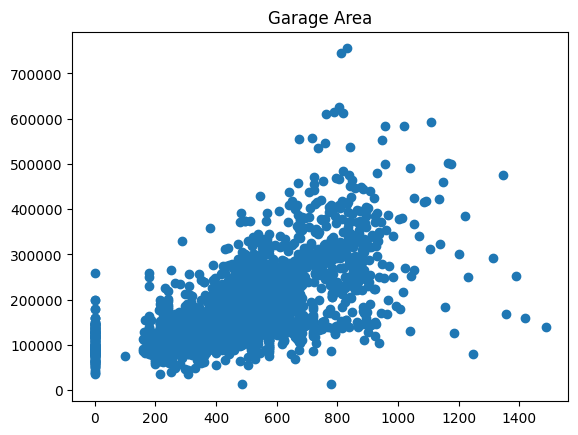

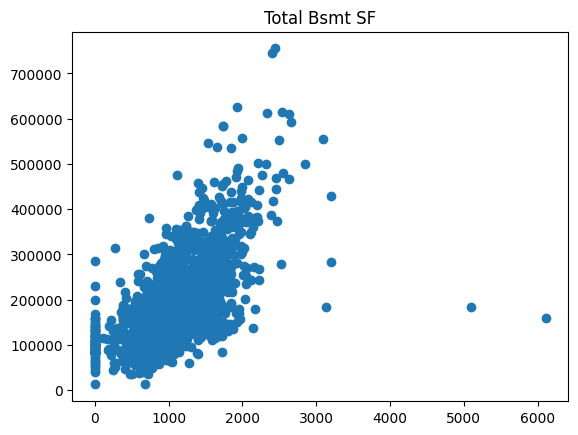

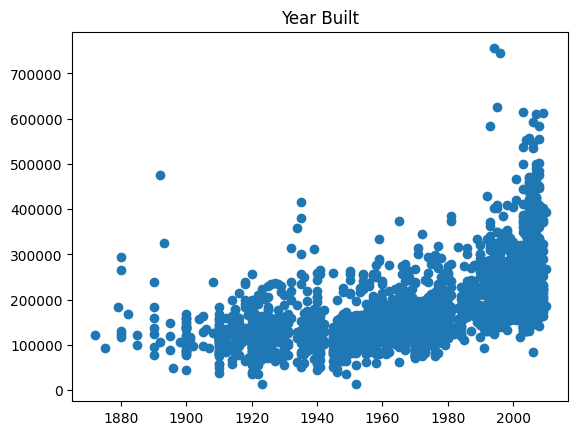

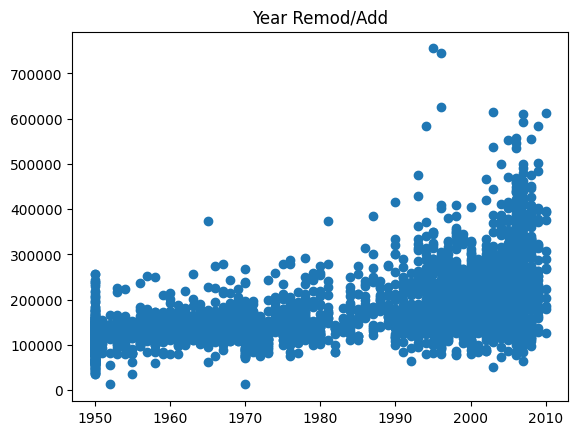

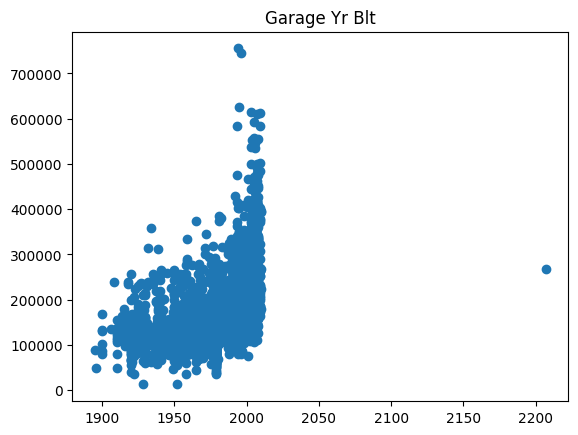

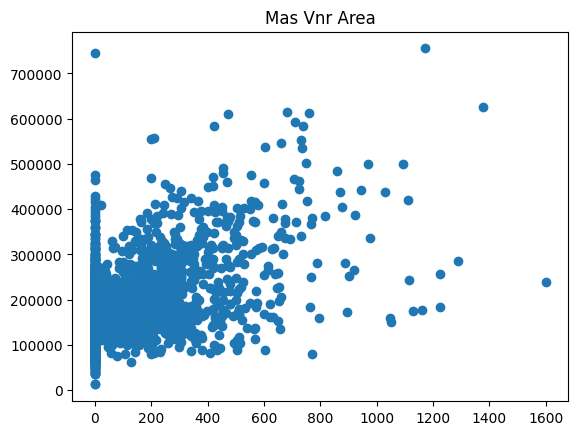

In [407]:
from matplotlib import pyplot as plot
saleprice = dataset["SalePrice"]
plots = [
	"Overall Qual",
	"Gr Liv Area",
	"Garage Area",
	"Total Bsmt SF",
	"Year Built",
	"Year Remod/Add",
	"Garage Yr Blt",
	"Mas Vnr Area"
]

for i in plots:
	plot.scatter(dataset[i], saleprice)
	plot.title(i)
	plot.show()
	plot.close()

# Linear Regression
This is where we perform linear regression on the data. For this, we use the "Gross Living Area" feature in order to predict the sale price. Although "Overall Quality" has a higher correlation with sale price, we chose to use Gross Living Area because of how the value, despite being numerical, is an ordinal categorical value between 0 and 10. This does not necessarily make it a bad fit for the data, but it makes it less precise for regression (due to data attempting to fit only specific intervals, rather than using a continuous stream of data)

In [408]:
from sklearn.model_selection import train_test_split
import numpy as np

# Setting up the values for regression
quality_plot = np.array(dataset["Gr Liv Area"]).reshape(-1, 1)
sale_price_plot = np.array(dataset["SalePrice"]).reshape(-1, 1)

# Splitting into training and test set
x_train, x_test, y_train, y_test = train_test_split(quality_plot, sale_price_plot, test_size=0.2, random_state=42)

print(f"{len(x_train)} train instances + {len(x_test)} test instances")

2344 train instances + 586 test instances


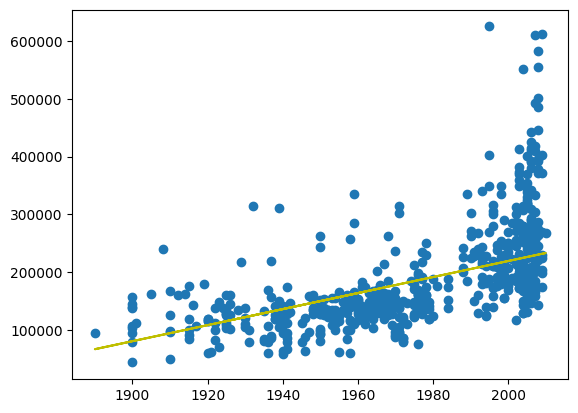

In [416]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot

# Performing linear regression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

# Predicting the y-test results
y_predicted = linear_regression.predict(x_test)

# Plotting the test data agains the predicted test result
plot.scatter(x_test, y_test)
plot.plot(x_test, y_predicted, "-r")

In [410]:
from sklearn.metrics import mean_squared_error

y_predicted = linear_regression.predict(x_test)
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(f"Root Mean Square Error: {lin_rmse}")

Root Mean Square Error: 61815.72669048421


# Polynomial Regression
For polynomial regression, the "Year Built" feature seems to have a strangely exponential impact on the price. Therefore we have chosen to investigate that correlation

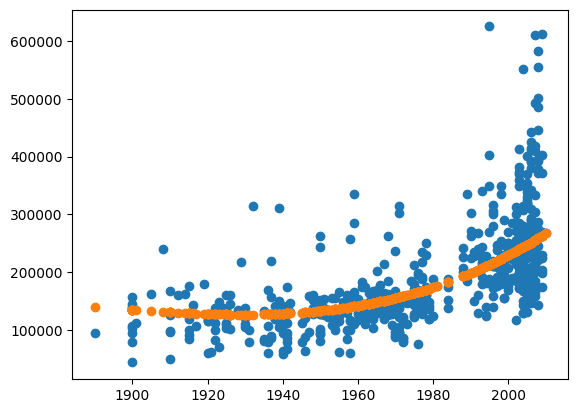

In [411]:
from sklearn.preprocessing import PolynomialFeatures

x_axis = "Year Built"
linear_regression = LinearRegression()

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(dataset[[x_axis]])
y_axis = dataset["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(x_poly, y_axis, test_size=0.2, random_state=42)
linear_regression.fit(x_train, y_train)

y_pred = linear_regression.predict(x_test)

plot.scatter(x_test[:,1], y_test)
plot.scatter(x_test[:,1], y_pred)

In [412]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(f"Root Mean Square Error: {lin_rmse}")

Root Mean Square Error: 67803.27331624883


# Random Forest Regression

C:\Users\sigve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


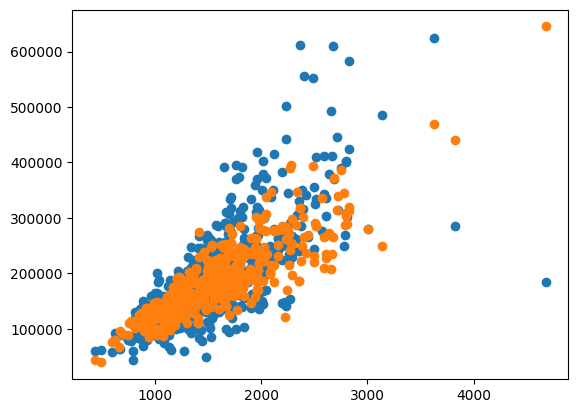

Root Mean Square Error: 70746.81010889843


In [413]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
x_axis = dataset[["Gr Liv Area"]]
y_axis = dataset[["SalePrice"]]

x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.2, random_state=42)
forest_reg.fit(x_train, y_train)

y_pred = forest_reg.predict(x_test)

plot.scatter(x_test, y_test)
plot.scatter(x_test, y_pred)
plot.show()
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(f"Root Mean Square Error: {lin_rmse}")

C:\Users\sigve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


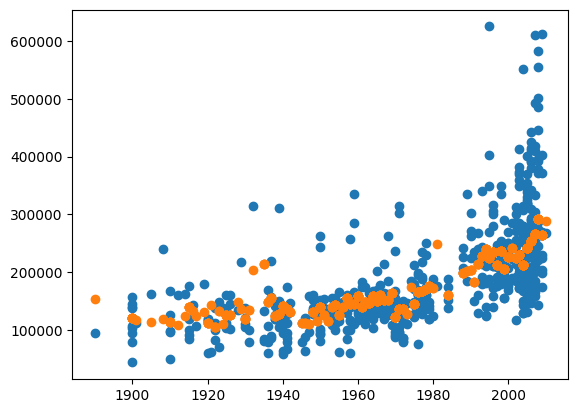

Root Mean Square Error: 66991.94948464572


In [414]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
x_axis = dataset[["Year Built"]]
y_axis = dataset[["SalePrice"]]

x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.2, random_state=42)
forest_reg.fit(x_train, y_train)

y_pred = forest_reg.predict(x_test)

plot.scatter(x_test, y_test)
plot.scatter(x_test, y_pred)
plot.show()
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(f"Root Mean Square Error: {lin_rmse}")